# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [7]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [8]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 465.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 652.2 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Notebook Presentation

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [11]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [13]:
df_data.shape

(4324, 9)

In [14]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [15]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [16]:
df_data.duplicated().sum()

np.int64(0)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [17]:
df_data = df_data.drop_duplicates()

In [18]:
df_data = df_data.dropna(subset=["Price"])


In [19]:
df_data.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

## Descriptive Statistics

In [20]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [22]:
df_data["Mission_Status"].value_counts()

Mission_Status
Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [23]:
launches_by_org = df_data["Organisation"].value_counts().head(10)
launches_by_org


Organisation
CASC            158
NASA            149
SpaceX           99
ULA              98
Arianespace      96
Northrop         83
ISRO             67
MHI              37
VKS RF           33
US Air Force     26
Name: count, dtype: int64

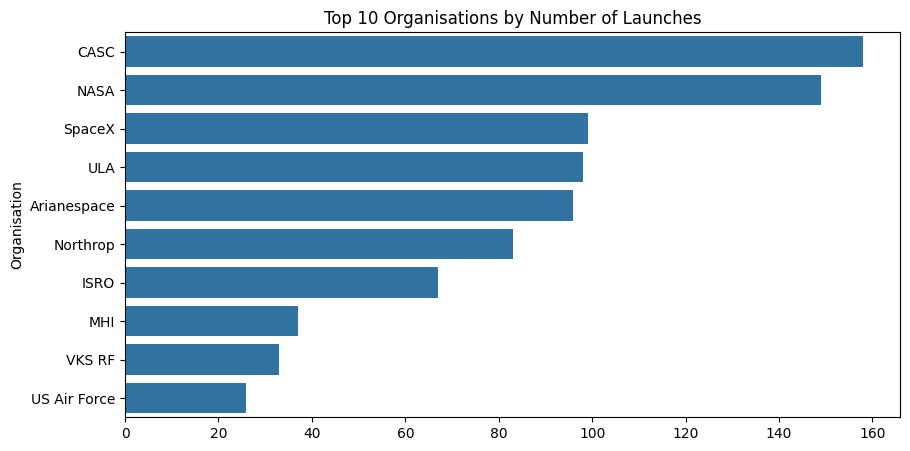

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=launches_by_org.values, y=launches_by_org.index)
plt.title("Top 10 Organisations by Number of Launches")
plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [25]:
df_data["Rocket_Status"].value_counts()

Rocket_Status
StatusActive     586
StatusRetired    378
Name: count, dtype: int64

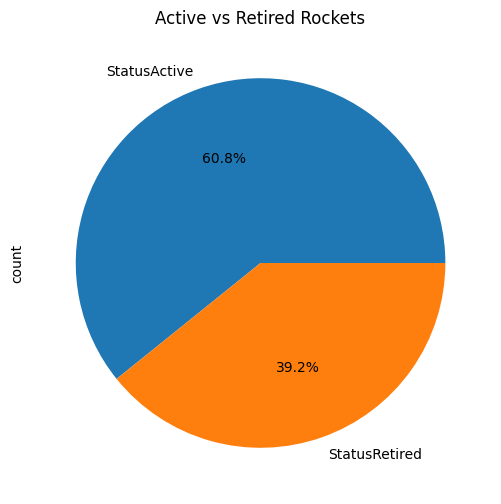

In [26]:
df_data["Rocket_Status"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6)
)
plt.title("Active vs Retired Rockets")
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [27]:
status_counts = df_data["Mission_Status"].value_counts()
status_counts

Mission_Status
Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64

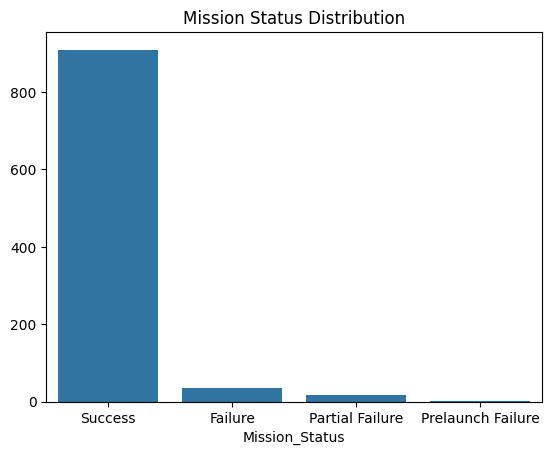

In [28]:
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title("Mission Status Distribution")
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [33]:
costs = df_data["Price"].dropna()

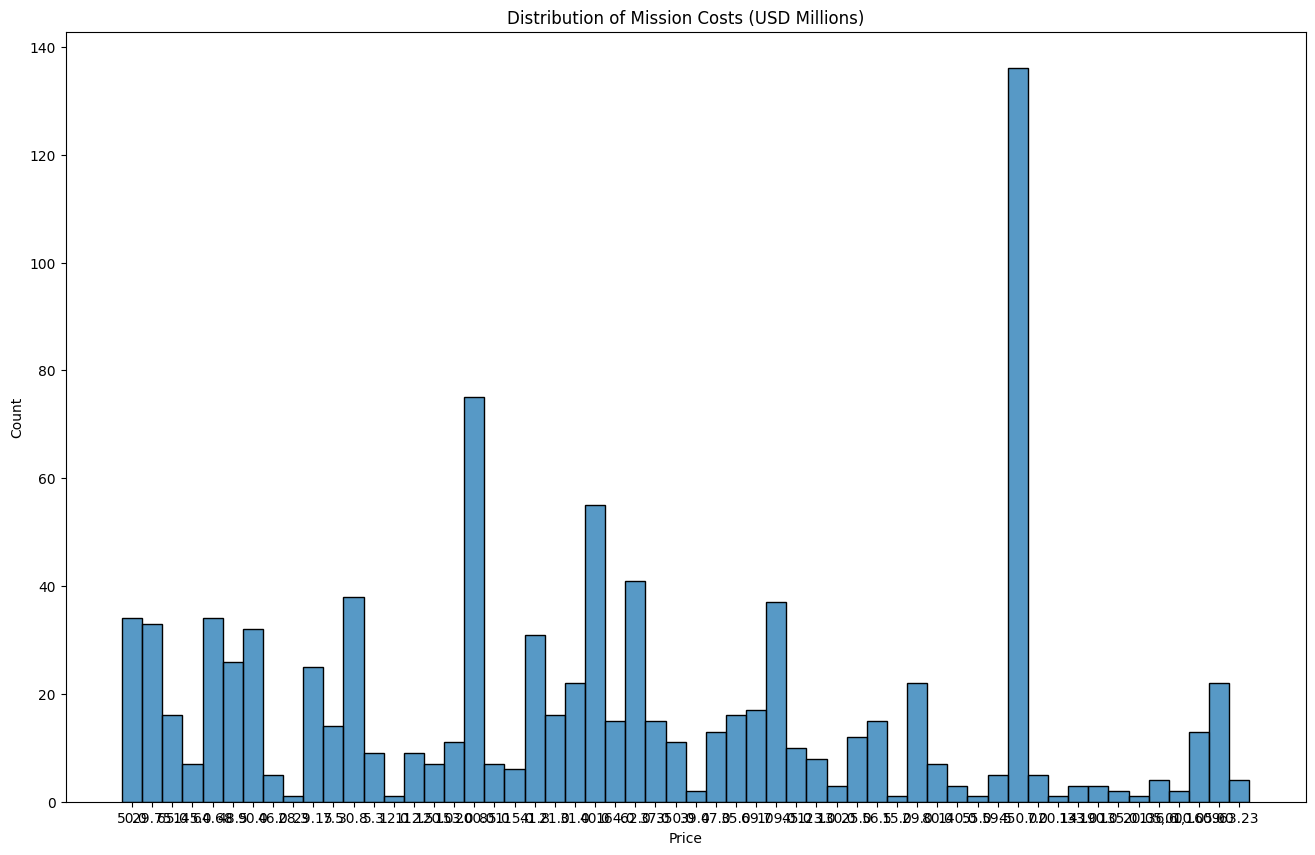

In [34]:
plt.figure(figsize=(16,10))
sns.histplot(costs, bins=50)
plt.title("Distribution of Mission Costs (USD Millions)")
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [35]:
df_data["Country"] = df_data["Location"].str.split(",").str[-1].str.strip()

In [36]:
country_counts = df_data["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Launches"]

In [37]:
def country_to_alpha3(country):
    try:
        return countries.get(country).alpha3
    except:
        return None

country_counts["iso_alpha"] = country_counts["Country"].apply(country_to_alpha3)

In [63]:
fig = px.choropleth(
    country_counts,
    locations="iso_alpha",
    color="Launches",
    color_continuous_scale="matter",
    title="Number of Launches by Country"
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Chart the Number of Launches per Year

In [ ]:
df_data["Date"] = pd.to_datetime(df_data["Date"], errors="coerce")
df_data["Year"] = df_data["Date"].dt.year

In [44]:
launches_per_year = df_data.groupby("Year").size()

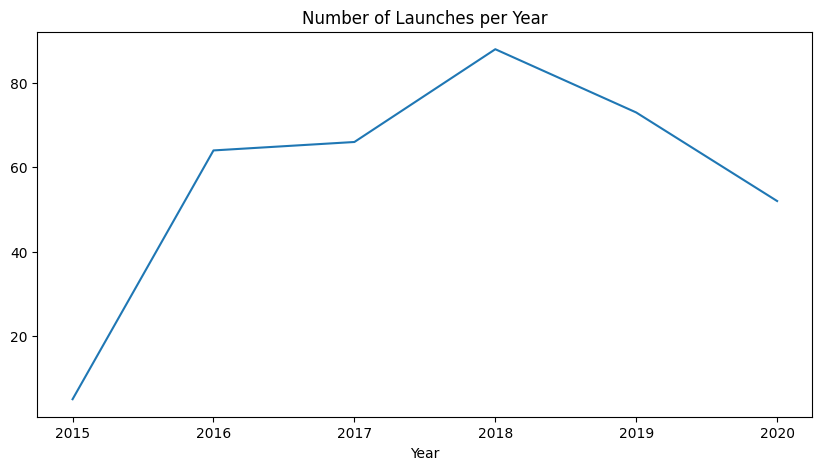

In [45]:
launches_per_year.plot(figsize=(10,5))
plt.title("Number of Launches per Year")
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [46]:
df_data["Date"] = pd.to_datetime(df_data["Date"], errors="coerce")
df_data["Month"] = df_data["Date"].dt.month

In [47]:
month_counts = df_data["Month"].value_counts().sort_index()

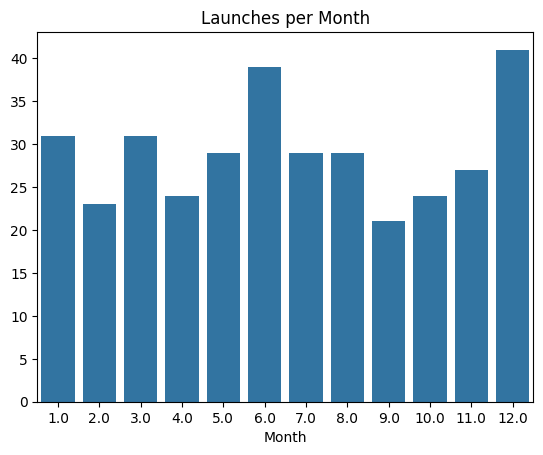

In [48]:
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Launches per Month")
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [55]:
df_data["Price"] = pd.to_numeric(df_data["Price"], errors="coerce")
avg_cost_year = df_data.groupby("Year")["Price"].mean()

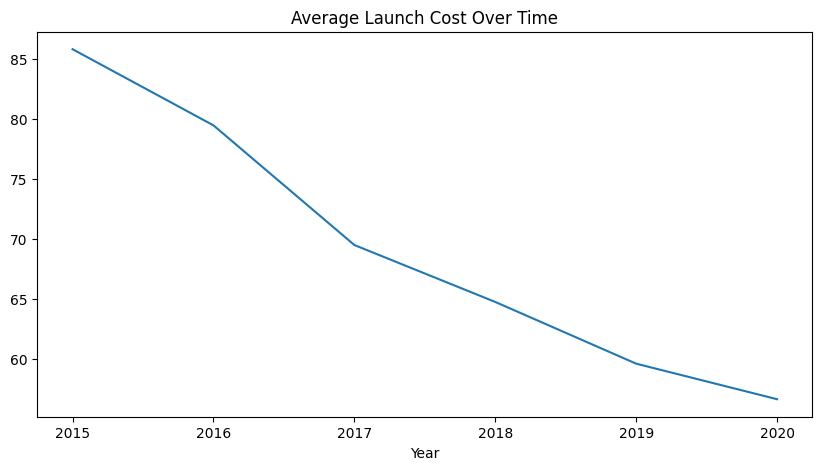

In [56]:
avg_cost_year.plot(figsize=(10,5))
plt.title("Average Launch Cost Over Time")
plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [51]:
top10 = df_data["Organisation"].value_counts().head(10).index

In [52]:
top10_df = df_data[df_data["Organisation"].isin(top10)]

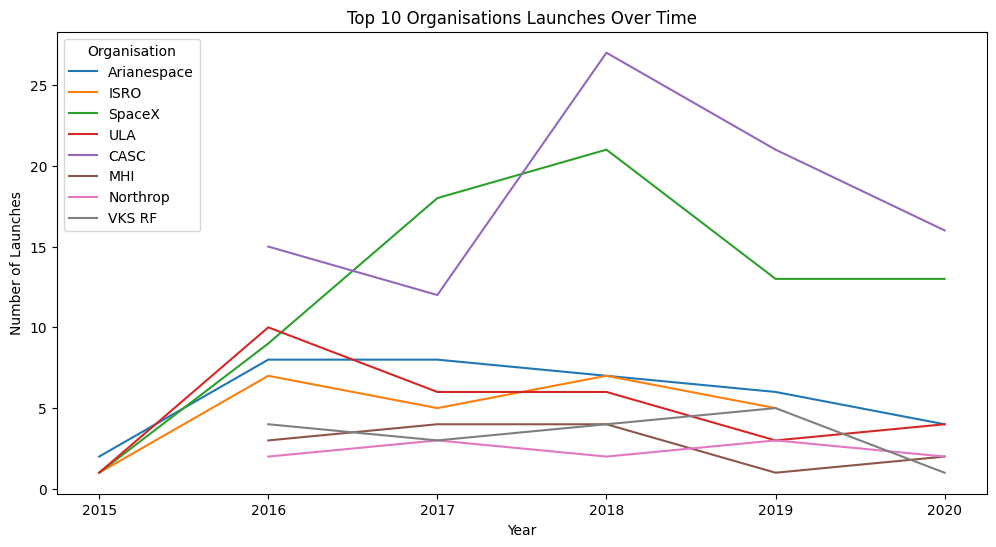

In [61]:
launches_per_year_org = (
    top10_df
    .groupby(["Year", "Organisation"])
    .size()
    .reset_index(name="Launches")
)
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=launches_per_year_org,
    x="Year",
    y="Launches",
    hue="Organisation"
)

plt.title("Top 10 Organisations Launches Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

In [58]:
failures = df_data[df_data["Mission_Status"] == "Failure"]

In [59]:
failures_per_year = failures.groupby("Year").size()

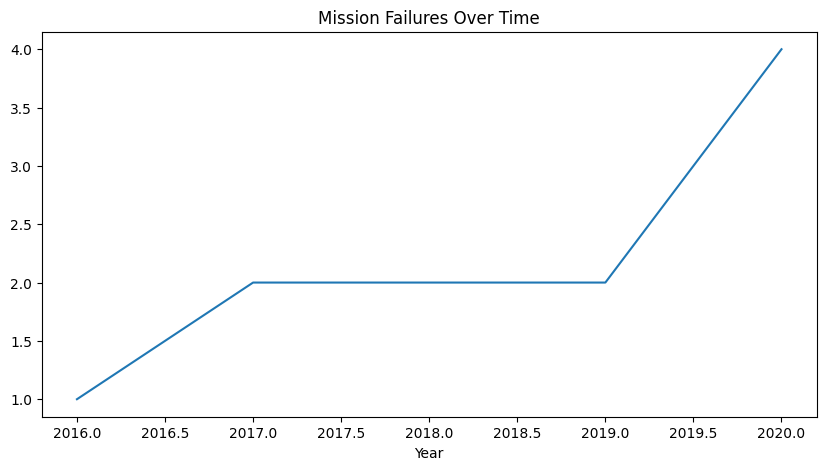

In [60]:
failures_per_year.plot(figsize=(10,5))
plt.title("Mission Failures Over Time")
plt.show()